In [17]:
#See how changing between amino acids effects RMSD as an average over all positions
import os
from Bio import SeqIO
import sys
sys.path.append('/mnt/ncshare/ozkilim/covid/covid_landscape/SARS2_RBD_Ab_escape_maps')
from bindingcalculator import BindingCalculator
from biopandas.pdb import PandasPdb
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import matplotlib.patches as mpatches

In [18]:
def pos_matrix_creator(PDB_filename):
    """"This function takes in a PDB and ... it returns a symetrix MxM matrix that is rotation and shift independant"""""
    ppdb = PandasPdb()
    data = ppdb.read_pdb(PDB_filename)
    atom_data = ppdb.df['ATOM']    
    mut_removed = atom_data
    position_matrix = mut_removed[["residue_number","x_coord" , "y_coord" , "z_coord"]]
    # aggresgate and take mean of xyz values for each residue as an approximation.
    aggregation_functions = {'x_coord': 'mean', 'y_coord': 'mean', 'z_coord': 'mean'}
    position_matrix = position_matrix.groupby(position_matrix['residue_number']).aggregate(aggregation_functions)  

    return position_matrix 

526
(201, 3)
(201, 3)


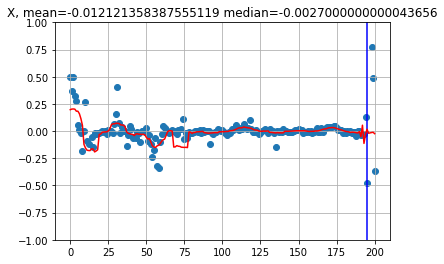

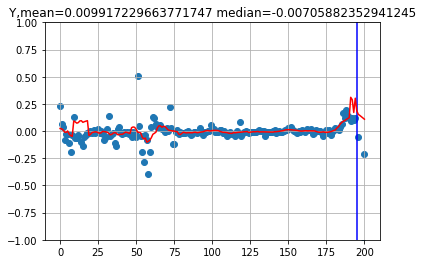

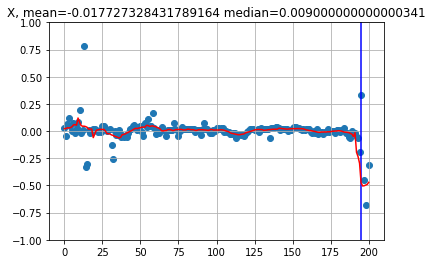

460
(201, 3)
(201, 3)


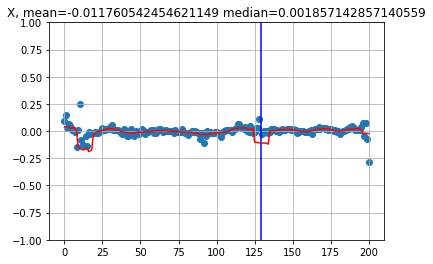

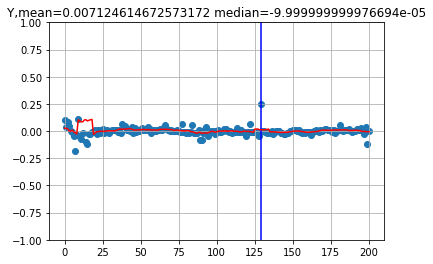

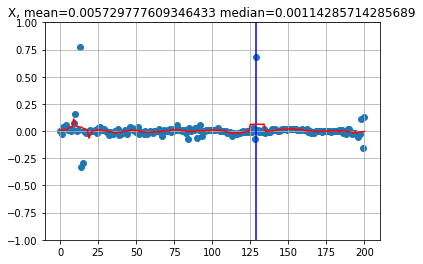

404
(201, 3)
(201, 3)


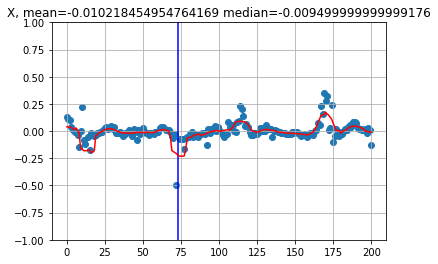

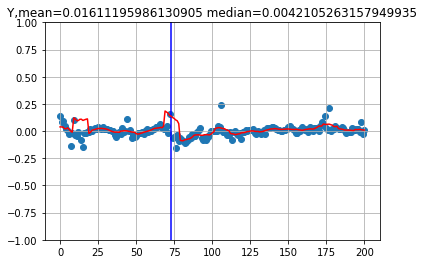

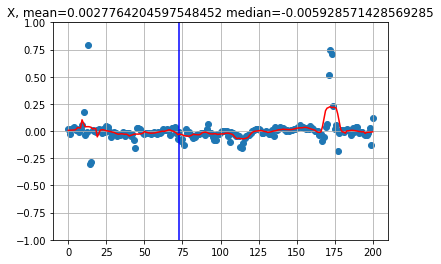

495
(201, 3)
(201, 3)


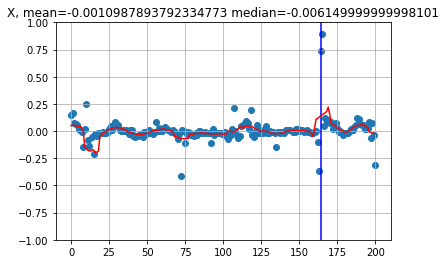

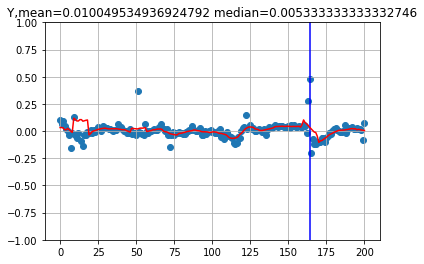

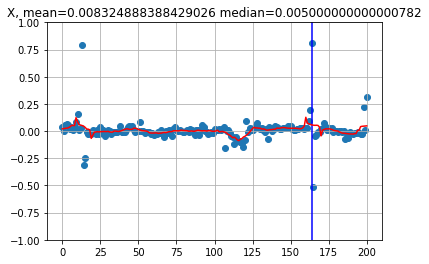

415
(201, 3)
(201, 3)


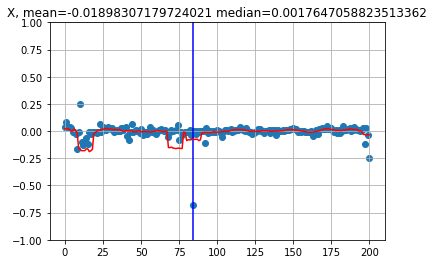

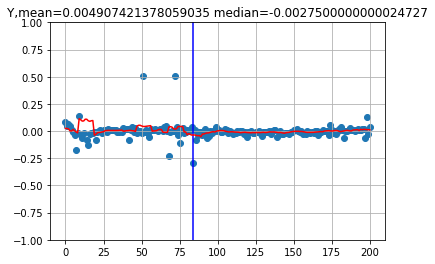

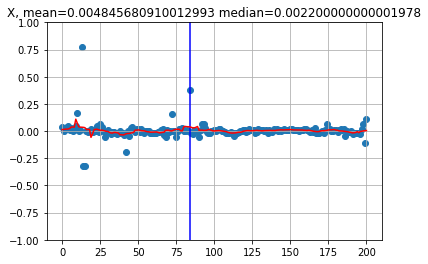

498
(201, 3)
(201, 3)


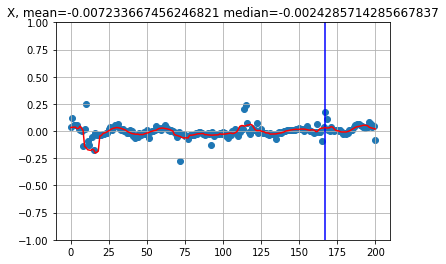

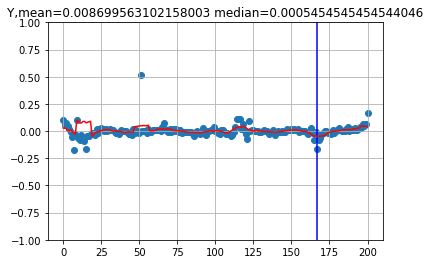

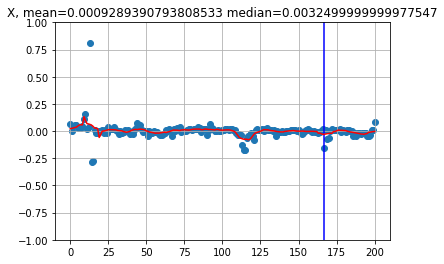

381
(201, 3)
(201, 3)


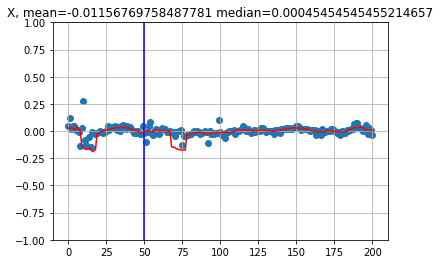

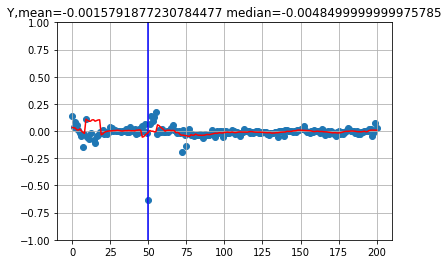

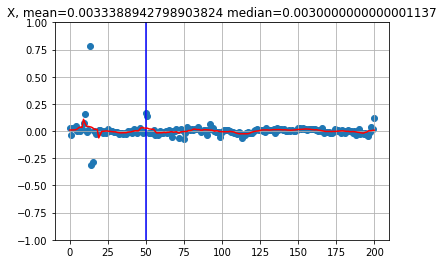

433
(201, 3)
(201, 3)


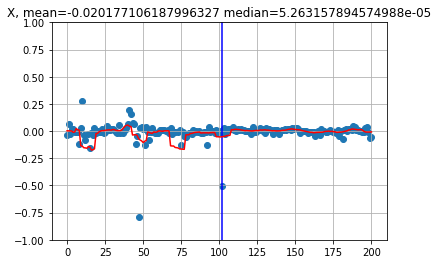

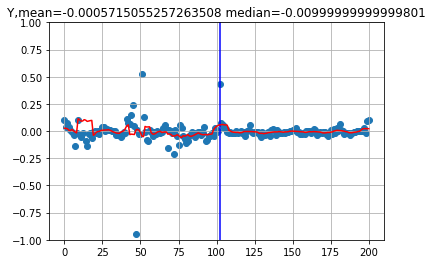

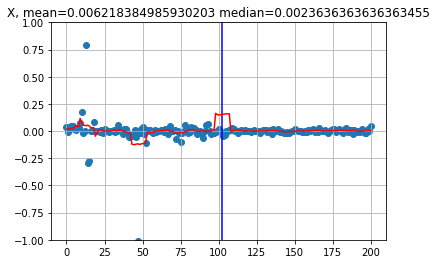

335
(201, 3)
(201, 3)


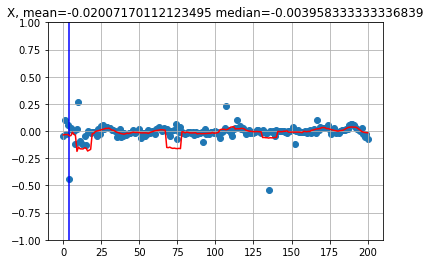

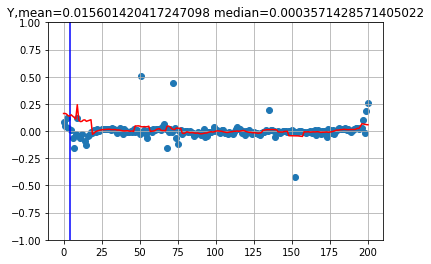

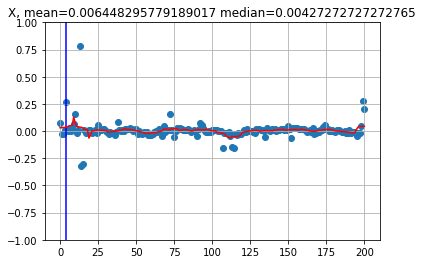

372
(201, 3)
(201, 3)


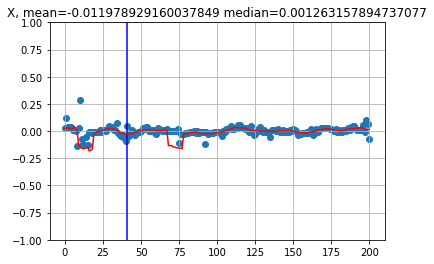

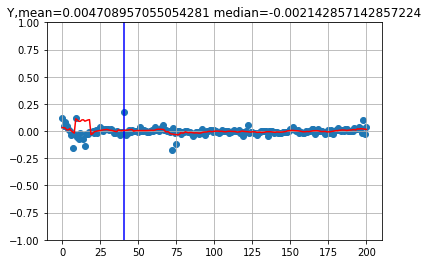

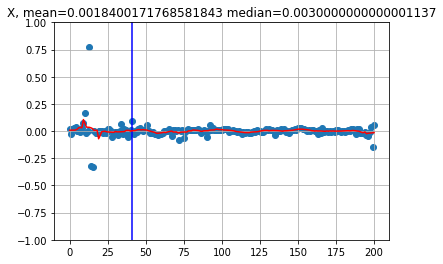

392
(201, 3)
(201, 3)


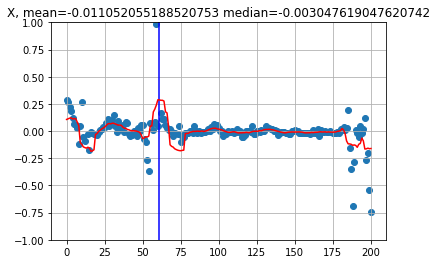

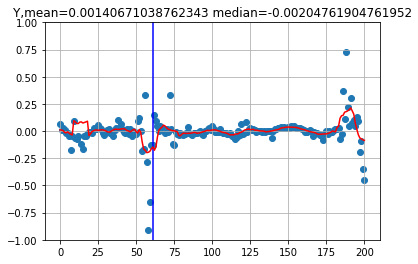

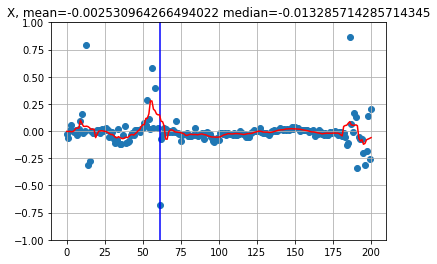

ValueError: invalid literal for int() with base 10: '0J_'

In [41]:
# Plot this as chain position... varies and mean variation in structure. ~40 mins to run.
# loop over all varientants and all pdbs

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


base_var_list = ["wuhan"] #match to how data is downloaded.

for dir in base_var_list:
    directory = "../structures/" + dir
    df2 = []
    for idx, filename in enumerate(os.listdir(directory)):
        file_path = os.path.join(directory, filename)
        mut_name = file_path[-9:-4]
        start = mut_name[0]
        target = mut_name[-1]
        pos = int(mut_name[1:-1])
        print(pos)
        # create distance matrix.
        d = pos_matrix_creator(file_path)
        # pdb_file = "../../covid_exploration/alfafold_mainvariants/pdbs/rot-Wuhan_RBD.pdb" #original wuhan structure.
        pdb_file = "../structures/wuhan/rot-Wuhan_RBD_331_531_A344F.pdb"
        wuhan_mat = pos_matrix_creator(pdb_file)
        print(wuhan_mat.shape)
        print(d.shape)
        dist = (wuhan_mat-d).to_numpy()


        plt.scatter(range(201),dist[:,0])

        y_av = movingaverage(dist[:,0], 10)
        plt.axvline(x = pos-331, color = 'b', label = 'Mutation Position')

        plt.title("X, mean="+str(np.mean(dist[:,0]))+" median="+str(np.median(dist[:,0])))
        plt.plot(y_av,c="r")
        plt.ylim([-1,1])
        plt.grid()
        plt.show()

        plt.title("Y,mean="+str(np.mean(dist[:,1]))+" median="+str(np.median(dist[:,1])))

        plt.scatter(range(201),dist[:,1])
        y_av = movingaverage(dist[:,1], 10)
        plt.axvline(x = pos-331, color = 'b', label = 'Mutation Position')

        plt.plot(y_av,c="r")
        plt.ylim([-1,1])

        plt.grid()
        plt.show()

        plt.title("X, mean="+str(np.mean(dist[:,2]))+" median="+str(np.median(dist[:,2])))
        plt.axvline(x = pos-331, color = 'b', label = 'Mutation Position')

        plt.scatter(range(201),dist[:,2])
        y_av = movingaverage(dist[:,2], 10)
        plt.plot(y_av,c="r")
        plt.grid()
        plt.ylim([-1,1])

        plt.show()
        # df2.append([pos,dist])
        # print(idx)
        
        

    # df3 = pd.DataFrame(df2, columns = ['pos','d'])
    # df3.to_csv("./xyz_diff/"+dir+".csv")
    peaks are corrolated with positions of mutations. Show this in one figure?

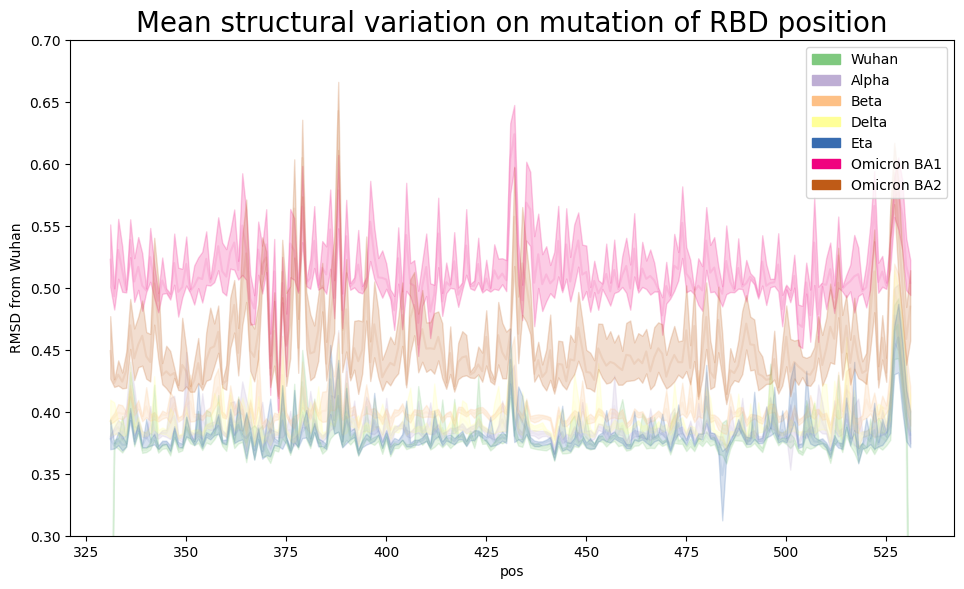

In [20]:
import seaborn as sn
# for each variant plot together the variation in positional mutation.
#get colorscheme used in rest of the paper.. 
colors = cm.get_cmap('Accent')

f, axes = plt.subplots(1, 1,figsize=(10, 6), dpi=100)

base_var_list = ["wuhan","alpha","beta","delta","eta","omicron_ba1","omicron_ba2"] #match to how data is downloaded.
for idx,dir in enumerate(base_var_list):

    df3=pd.read_csv("./pos_df/"+dir+".csv",index_col=0)
    sn.lineplot(data=df3, x='pos', y='d', legend = False,ax=axes,alpha=0.1,color=colors(idx))
    axes.set_ylim([0.30,0.7]) #change pos to show real amino acid pos in the RBD...
    # axes.set_xticklabels(330,531)


f.tight_layout(pad=2.0)
Wuhan = mpatches.Patch(color=colors(0), label='Wuhan')
alpha = mpatches.Patch(color=colors(1), label='Alpha')
beta = mpatches.Patch(color=colors(2), label='Beta')
delta = mpatches.Patch(color=colors(3), label='Delta')
eta = mpatches.Patch(color=colors(4), label='Eta')
omi1 = mpatches.Patch(color=colors(5), label='Omicron BA1')
omi2 = mpatches.Patch(color=colors(6), label='Omicron BA2')

legend2 = plt.legend(handles=[Wuhan,alpha,beta,delta,eta,omi1,omi2],loc=1)

axes.set_title('Mean structural variation on mutation of RBD position',fontsize=20)
axes.set_ylabel("RMSD from Wuhan")
plt.show() #plot for each variant together?... plot where mutas are? 
f.savefig("../reasults_figs/mut_at_position.png",bbox_inches='tight',facecolor="white")


In [21]:
f.savefig("../reasults_figs/mut_at_position.png",bbox_inches='tight',facecolor="white")
